In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install keras

In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd

In [2]:
# fix random seed for reproducibility
seed = 0
numpy.random.seed(seed)

In [3]:
dataset = pd.read_csv("/content/forestfires.csv")
dataset = dataset.drop(['month', 'day'], axis = 1)
dataset

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [5]:
import numpy as np

In [6]:
# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:28]
y = dataset.iloc[:,-1]

In [7]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='temp', ylabel='wind'>

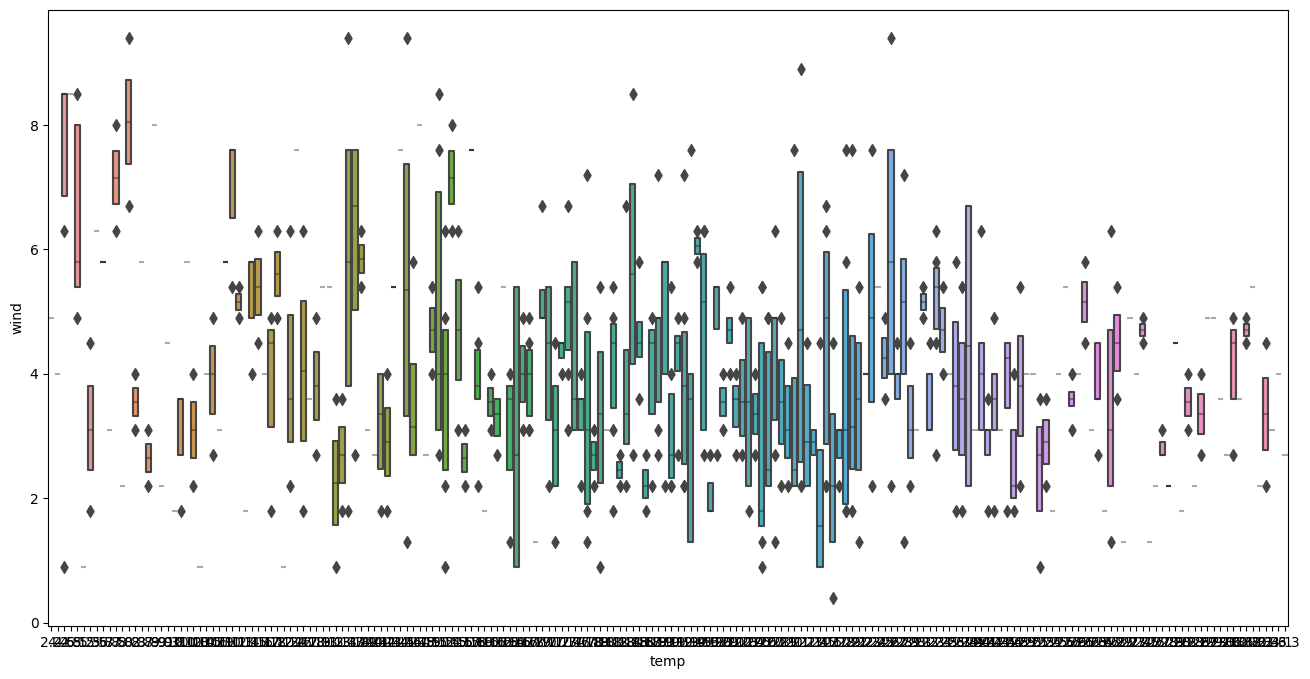

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8));
sns.boxenplot(x = 'temp', y = 'wind', data = dataset)

<Axes: xlabel='DMC', ylabel='DC'>

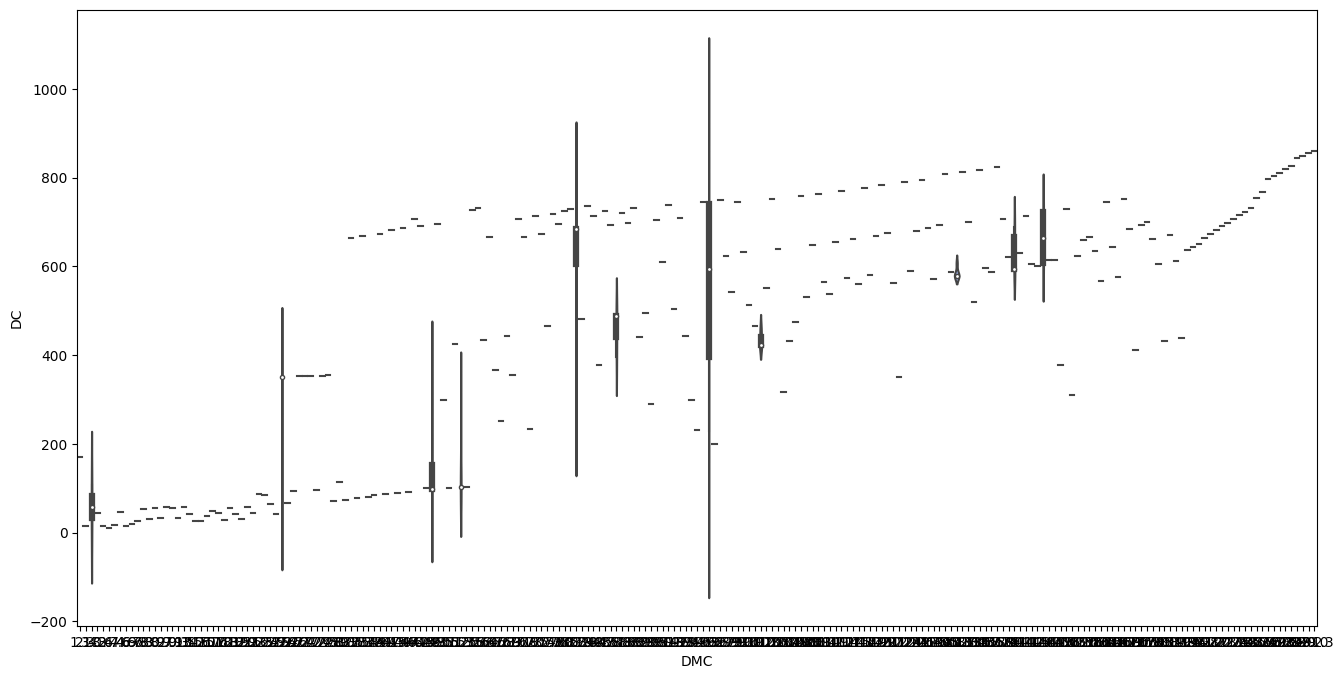

In [10]:
plt.figure(figsize = (16, 8));
sns.violinplot(x = 'DMC', y = 'DC', data = dataset)

In [11]:
fire = dataset[dataset.columns[0:11]]

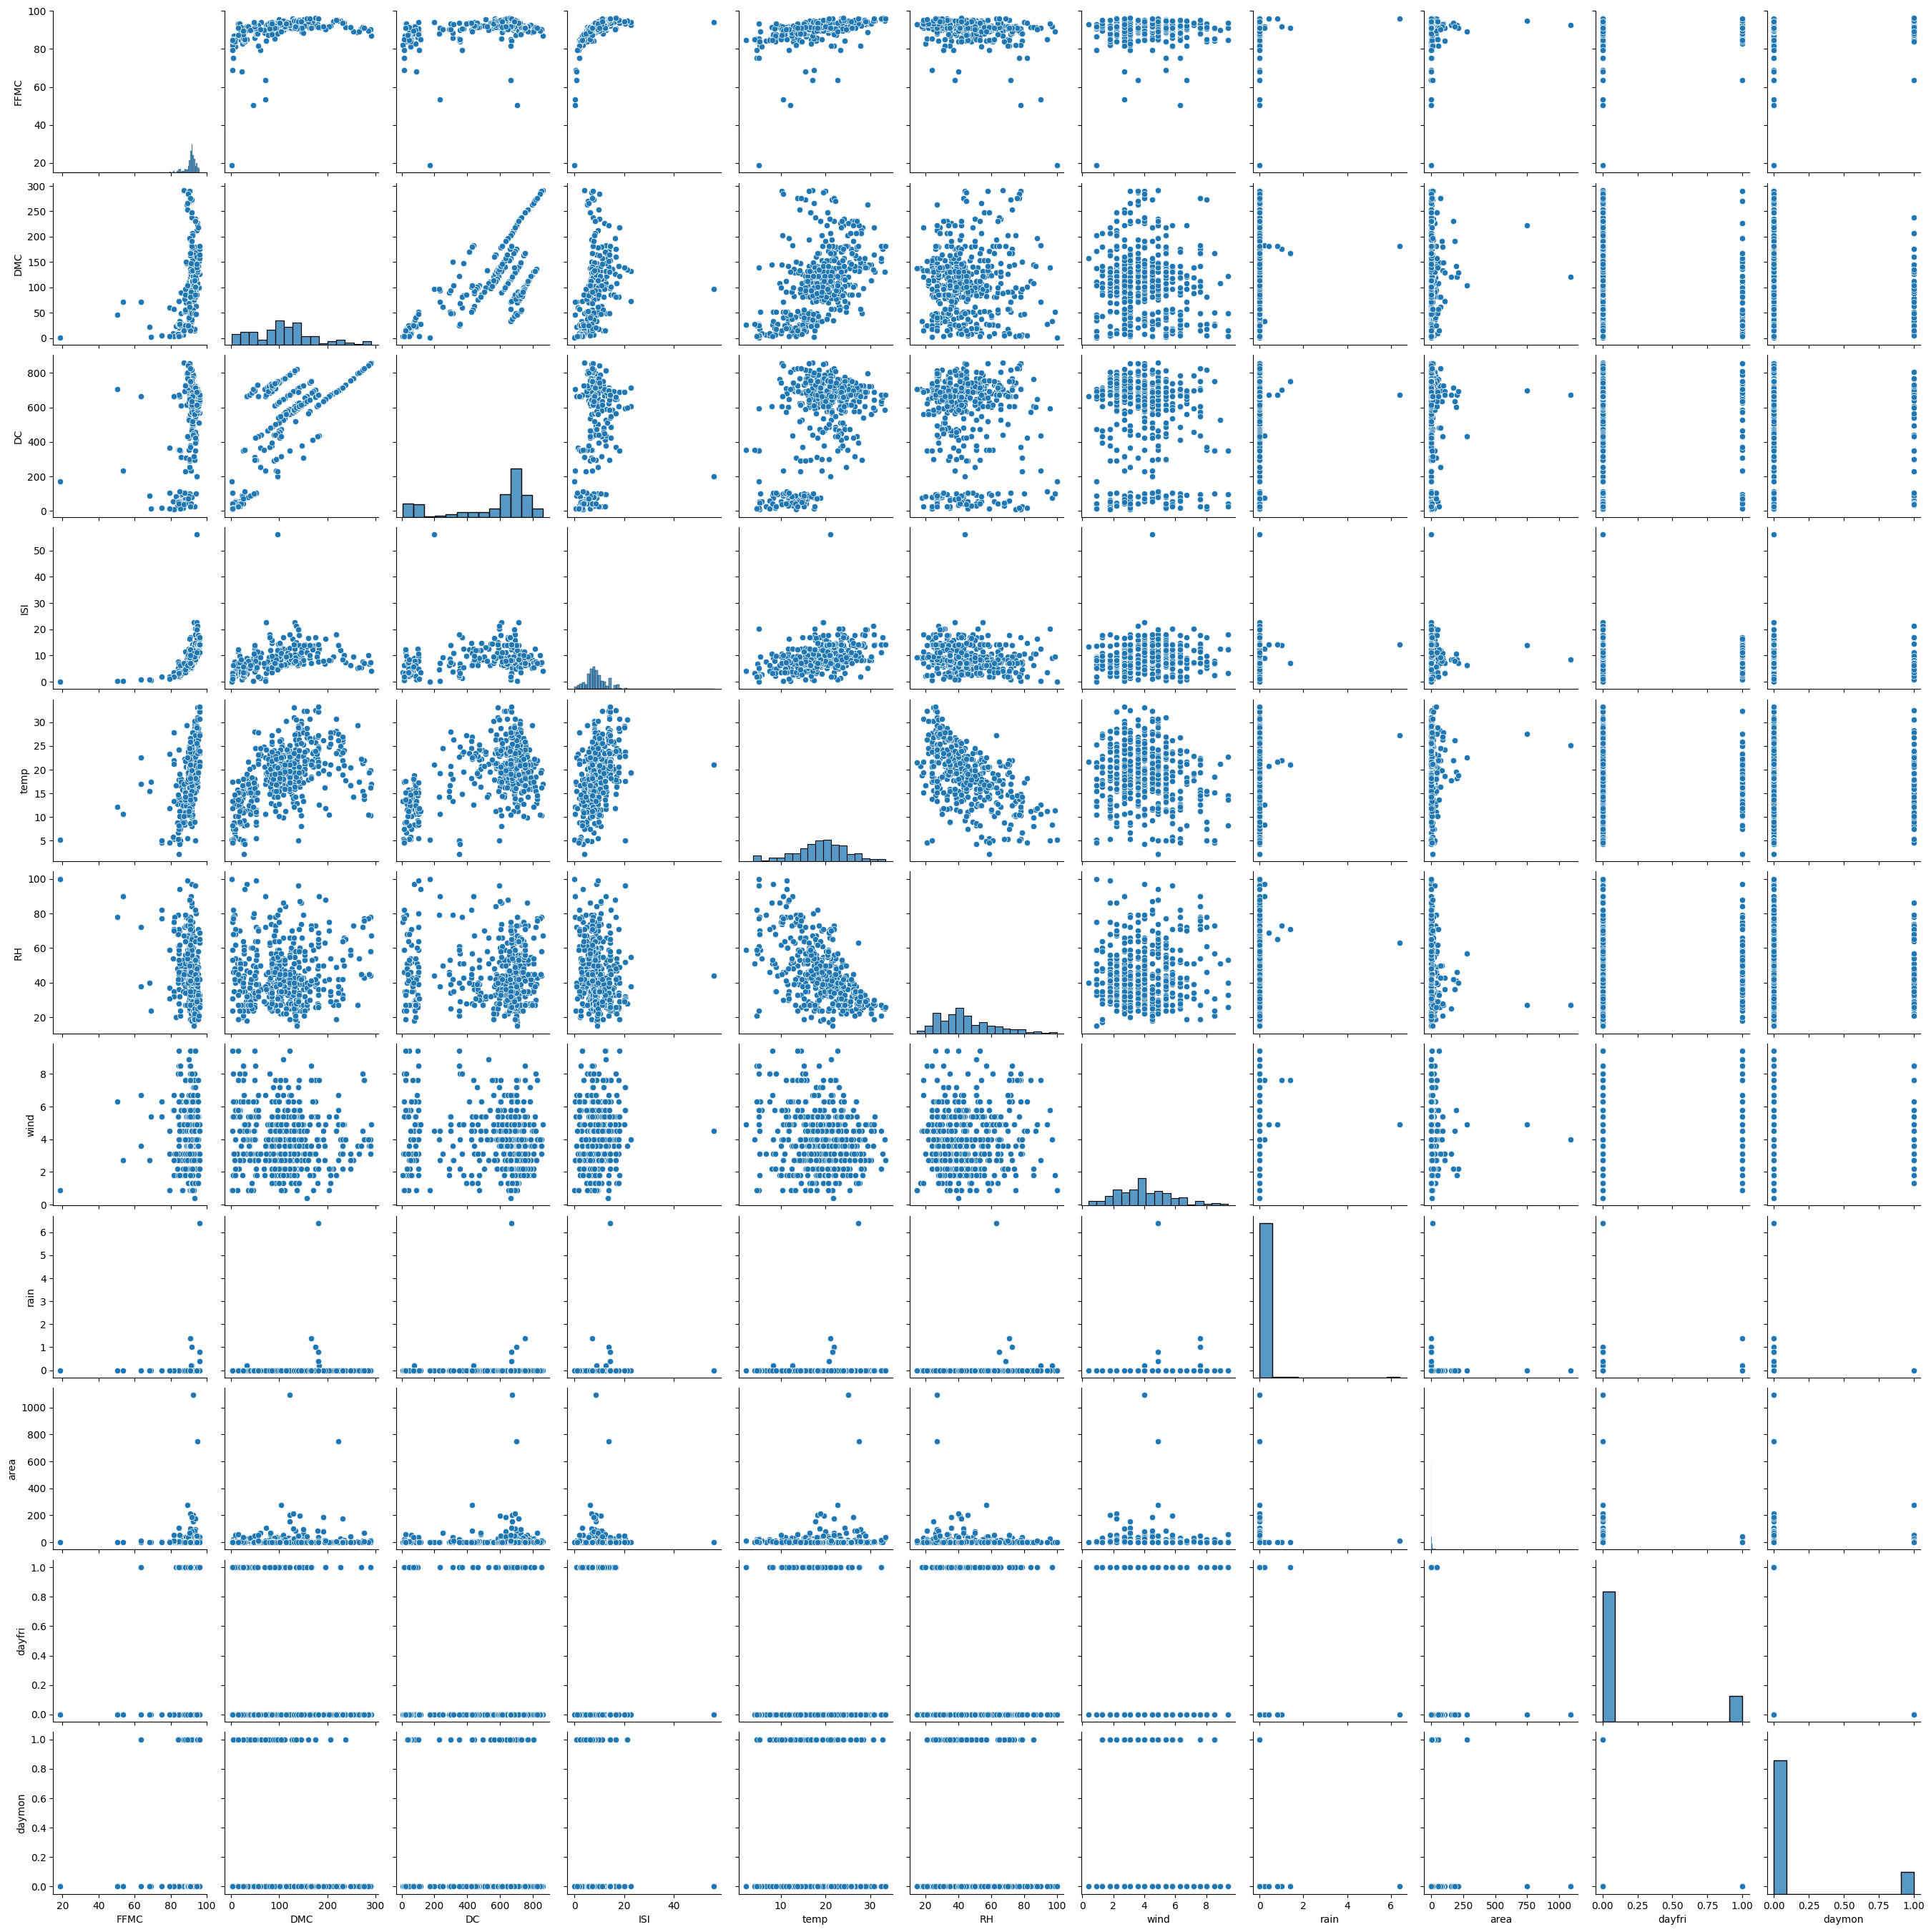

In [12]:
sns.pairplot(fire)

In [13]:
corr = dataset[dataset.columns[0:11]].corr()

<Axes: >

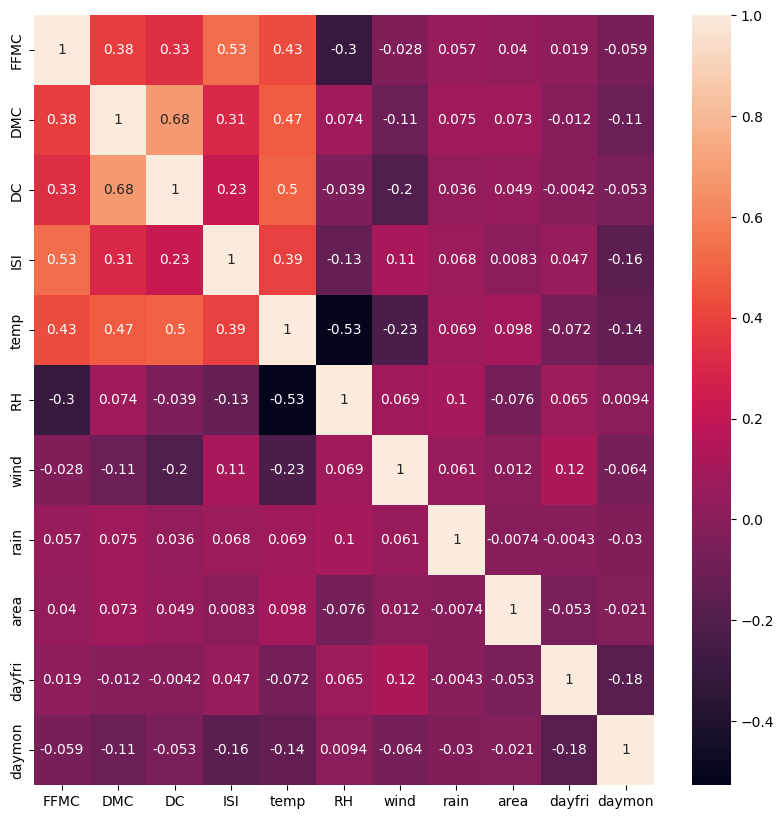

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
# encoding the categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
518*0.67

347.06

In [ ]:
# Fit the model
history = model.fit(X, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 14ms/step - loss: 7.8216 - accuracy: 0.3208 - val_loss: 2.4899 - val_accuracy: 0.4912
Epoch 2/250
35/35 [==============================] - 0s 5ms/step - loss: 1.5441 - accuracy: 0.6243 - val_loss: 2.6218 - val_accuracy: 0.3860
Epoch 3/250
35/35 [==============================] - 0s 6ms/step - loss: 0.9026 - accuracy: 0.6301 - val_loss: 1.9703 - val_accuracy: 0.4327
Epoch 4/250
35/35 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.7283 - val_loss: 1.5083 - val_accuracy: 0.5205
Epoch 5/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5703 - accuracy: 0.7572 - val_loss: 1.1857 - val_accuracy: 0.5497
Epoch 6/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5052 - accuracy: 0.7890 - val_loss: 0.9860 - val_accuracy: 0.6140
Epoch 7/250
35/35 [==============================] - 0s 5ms/step - loss: 0.4400 - accuracy: 0.8092 - val_loss: 0.9648 - val_accuracy: 0.6023
Epoch 8/250


In [ ]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9768
accuracy: 97.68%


In [ ]:
# Visualize training history

# list all data in history

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

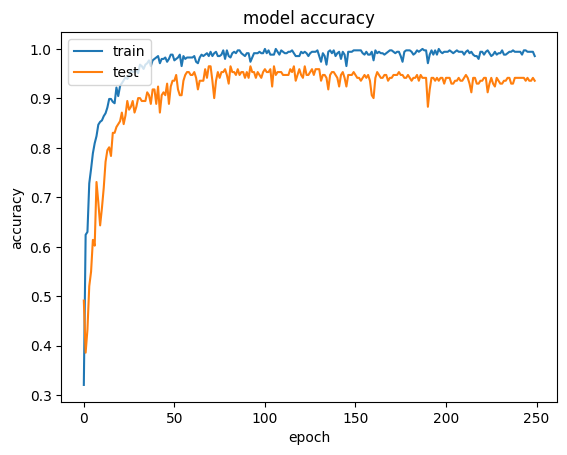

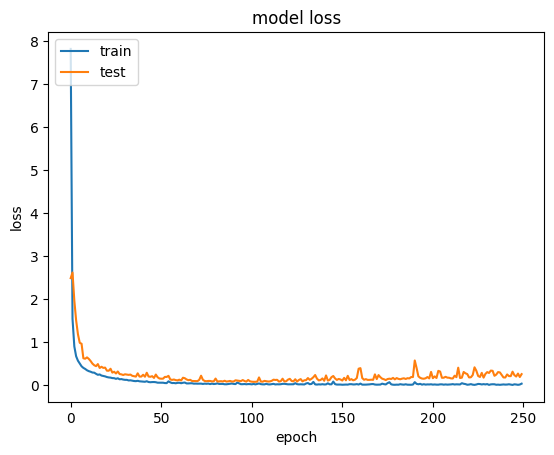

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# HYPER PARAMETER TUNING

In [15]:
from sklearn.preprocessing import StandardScaler
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [16]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,4.123072e-17,3.435893e-18,...,-6.871787e-17,2.061536e-17,2.233331e-17,-1.374357e-17,-1.374357e-17,-8.246144e-17,-1.717947e-17,-1.030768e-17,5.497429e-17,2.748715e-17
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01,2.254407e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


### HYPER PARAMETER TUNING- BATCH SIZE AND EPOCH

In [17]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [18]:
from tensorflow.keras.optimizers import Adam

In [19]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [20]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100,150]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-20-04cd1513f08b>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................


[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=1.000 total time=   4.3s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................


[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.750 total time=   1.7s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................


[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.524 total time=   1.7s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................


[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.699 total time=   2.3s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................


[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.738 total time=   1.8s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................


[CV 1/5; 2/12] END ....batch_size=10, epochs=50;, score=1.000 total time=   6.2s
[CV 2/5; 2/12] START batch_size=10, epochs=50...................................


[CV 2/5; 2/12] END ....batch_size=10, epochs=50;, score=0.885 total time=   6.2s
[CV 3/5; 2/12] START batch_size=10, epochs=50...................................


[CV 3/5; 2/12] END ....batch_size=10, epochs=50;, score=0.903 total time=   4.0s
[CV 4/5; 2/12] START batch_size=10, epochs=50...................................


[CV 4/5; 2/12] END ....batch_size=10, epochs=50;, score=0.903 total time=   6.3s
[CV 5/5; 2/12] START batch_size=10, epochs=50...................................


[CV 5/5; 2/12] END ....batch_size=10, epochs=50;, score=0.932 total time=   6.2s
[CV 1/5; 3/12] START batch_size=10, epochs=100..................................


[CV 1/5; 3/12] END ...batch_size=10, epochs=100;, score=1.000 total time=  11.3s
[CV 2/5; 3/12] START batch_size=10, epochs=100..................................


[CV 2/5; 3/12] END ...batch_size=10, epochs=100;, score=0.875 total time=  21.7s
[CV 3/5; 3/12] START batch_size=10, epochs=100..................................


[CV 3/5; 3/12] END ...batch_size=10, epochs=100;, score=0.913 total time=  11.6s
[CV 4/5; 3/12] START batch_size=10, epochs=100..................................


[CV 4/5; 3/12] END ...batch_size=10, epochs=100;, score=0.942 total time=  11.8s
[CV 5/5; 3/12] START batch_size=10, epochs=100..................................


[CV 5/5; 3/12] END ...batch_size=10, epochs=100;, score=0.903 total time=  12.4s
[CV 1/5; 4/12] START batch_size=10, epochs=150..................................


[CV 1/5; 4/12] END ...batch_size=10, epochs=150;, score=1.000 total time=  21.9s
[CV 2/5; 4/12] START batch_size=10, epochs=150..................................


[CV 2/5; 4/12] END ...batch_size=10, epochs=150;, score=0.885 total time=  13.1s
[CV 3/5; 4/12] START batch_size=10, epochs=150..................................


[CV 3/5; 4/12] END ...batch_size=10, epochs=150;, score=0.893 total time=  12.2s
[CV 4/5; 4/12] START batch_size=10, epochs=150..................................


[CV 4/5; 4/12] END ...batch_size=10, epochs=150;, score=0.922 total time=  11.8s
[CV 5/5; 4/12] START batch_size=10, epochs=150..................................


[CV 5/5; 4/12] END ...batch_size=10, epochs=150;, score=0.845 total time=  11.7s
[CV 1/5; 5/12] START batch_size=20, epochs=10...................................


[CV 1/5; 5/12] END ....batch_size=20, epochs=10;, score=0.981 total time=   2.0s
[CV 2/5; 5/12] START batch_size=20, epochs=10...................................


[CV 2/5; 5/12] END ....batch_size=20, epochs=10;, score=0.750 total time=   1.9s
[CV 3/5; 5/12] START batch_size=20, epochs=10...................................


[CV 3/5; 5/12] END ....batch_size=20, epochs=10;, score=0.524 total time=   1.7s
[CV 4/5; 5/12] START batch_size=20, epochs=10...................................


[CV 4/5; 5/12] END ....batch_size=20, epochs=10;, score=0.680 total time=   1.7s
[CV 5/5; 5/12] START batch_size=20, epochs=10...................................


[CV 5/5; 5/12] END ....batch_size=20, epochs=10;, score=0.699 total time=   1.7s
[CV 1/5; 6/12] START batch_size=20, epochs=50...................................


[CV 1/5; 6/12] END ....batch_size=20, epochs=50;, score=1.000 total time=   4.0s
[CV 2/5; 6/12] START batch_size=20, epochs=50...................................


[CV 2/5; 6/12] END ....batch_size=20, epochs=50;, score=0.827 total time=   4.5s
[CV 3/5; 6/12] START batch_size=20, epochs=50...................................


[CV 3/5; 6/12] END ....batch_size=20, epochs=50;, score=0.864 total time=   2.6s
[CV 4/5; 6/12] START batch_size=20, epochs=50...................................


[CV 4/5; 6/12] END ....batch_size=20, epochs=50;, score=0.835 total time=   2.7s
[CV 5/5; 6/12] START batch_size=20, epochs=50...................................


[CV 5/5; 6/12] END ....batch_size=20, epochs=50;, score=0.864 total time=   4.2s
[CV 1/5; 7/12] START batch_size=20, epochs=100..................................


[CV 1/5; 7/12] END ...batch_size=20, epochs=100;, score=1.000 total time=   7.6s
[CV 2/5; 7/12] START batch_size=20, epochs=100..................................


[CV 2/5; 7/12] END ...batch_size=20, epochs=100;, score=0.885 total time=   6.1s
[CV 3/5; 7/12] START batch_size=20, epochs=100..................................


[CV 3/5; 7/12] END ...batch_size=20, epochs=100;, score=0.913 total time=   4.2s
[CV 4/5; 7/12] START batch_size=20, epochs=100..................................


[CV 4/5; 7/12] END ...batch_size=20, epochs=100;, score=0.903 total time=   6.3s
[CV 5/5; 7/12] START batch_size=20, epochs=100..................................


[CV 5/5; 7/12] END ...batch_size=20, epochs=100;, score=0.874 total time=   4.6s
[CV 1/5; 8/12] START batch_size=20, epochs=150..................................


[CV 1/5; 8/12] END ...batch_size=20, epochs=150;, score=1.000 total time=   5.9s
[CV 2/5; 8/12] START batch_size=20, epochs=150..................................


[CV 2/5; 8/12] END ...batch_size=20, epochs=150;, score=0.856 total time=   6.6s
[CV 3/5; 8/12] START batch_size=20, epochs=150..................................


[CV 3/5; 8/12] END ...batch_size=20, epochs=150;, score=0.883 total time=   5.9s
[CV 4/5; 8/12] START batch_size=20, epochs=150..................................


[CV 4/5; 8/12] END ...batch_size=20, epochs=150;, score=0.932 total time=   9.2s
[CV 5/5; 8/12] START batch_size=20, epochs=150..................................


[CV 5/5; 8/12] END ...batch_size=20, epochs=150;, score=0.874 total time=  10.2s
[CV 1/5; 9/12] START batch_size=40, epochs=10...................................


[CV 1/5; 9/12] END ....batch_size=40, epochs=10;, score=1.000 total time=   1.8s
[CV 2/5; 9/12] START batch_size=40, epochs=10...................................


[CV 2/5; 9/12] END ....batch_size=40, epochs=10;, score=0.750 total time=   1.8s
[CV 3/5; 9/12] START batch_size=40, epochs=10...................................


[CV 3/5; 9/12] END ....batch_size=40, epochs=10;, score=0.524 total time=   1.7s
[CV 4/5; 9/12] START batch_size=40, epochs=10...................................


[CV 4/5; 9/12] END ....batch_size=40, epochs=10;, score=0.680 total time=   1.8s
[CV 5/5; 9/12] START batch_size=40, epochs=10...................................


[CV 5/5; 9/12] END ....batch_size=40, epochs=10;, score=0.699 total time=   4.2s
[CV 1/5; 10/12] START batch_size=40, epochs=50..................................


[CV 1/5; 10/12] END ...batch_size=40, epochs=50;, score=0.981 total time=   4.1s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................


[CV 2/5; 10/12] END ...batch_size=40, epochs=50;, score=0.779 total time=   2.6s
[CV 3/5; 10/12] START batch_size=40, epochs=50..................................


[CV 3/5; 10/12] END ...batch_size=40, epochs=50;, score=0.660 total time=   4.3s
[CV 4/5; 10/12] START batch_size=40, epochs=50..................................


[CV 4/5; 10/12] END ...batch_size=40, epochs=50;, score=0.728 total time=   2.9s
[CV 5/5; 10/12] START batch_size=40, epochs=50..................................


[CV 5/5; 10/12] END ...batch_size=40, epochs=50;, score=0.816 total time=   2.4s
[CV 1/5; 11/12] START batch_size=40, epochs=100.................................


[CV 1/5; 11/12] END ..batch_size=40, epochs=100;, score=1.000 total time=   4.2s
[CV 2/5; 11/12] START batch_size=40, epochs=100.................................


[CV 2/5; 11/12] END ..batch_size=40, epochs=100;, score=0.846 total time=   3.8s
[CV 3/5; 11/12] START batch_size=40, epochs=100.................................


[CV 3/5; 11/12] END ..batch_size=40, epochs=100;, score=0.903 total time=   2.9s
[CV 4/5; 11/12] START batch_size=40, epochs=100.................................


[CV 4/5; 11/12] END ..batch_size=40, epochs=100;, score=0.845 total time=   3.6s
[CV 5/5; 11/12] START batch_size=40, epochs=100.................................


[CV 5/5; 11/12] END ..batch_size=40, epochs=100;, score=0.864 total time=   3.0s
[CV 1/5; 12/12] START batch_size=40, epochs=150.................................


[CV 1/5; 12/12] END ..batch_size=40, epochs=150;, score=1.000 total time=  13.9s
[CV 2/5; 12/12] START batch_size=40, epochs=150.................................


[CV 2/5; 12/12] END ..batch_size=40, epochs=150;, score=0.846 total time=   8.1s
[CV 3/5; 12/12] START batch_size=40, epochs=150.................................


[CV 3/5; 12/12] END ..batch_size=40, epochs=150;, score=0.883 total time=   6.5s
[CV 4/5; 12/12] START batch_size=40, epochs=150.................................


[CV 4/5; 12/12] END ..batch_size=40, epochs=150;, score=0.903 total time=   6.7s
[CV 5/5; 12/12] START batch_size=40, epochs=150.................................


[CV 5/5; 12/12] END ..batch_size=40, epochs=150;, score=0.893 total time=   6.5s


In [21]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9264563083648681, using {'batch_size': 10, 'epochs': 100}
0.7422330141067505,0.15224774392940219 with: {'batch_size': 10, 'epochs': 10}
0.9244958877563476,0.040693730929330166 with: {'batch_size': 10, 'epochs': 50}
0.9264563083648681,0.04251107830534937 with: {'batch_size': 10, 'epochs': 100}
0.9089619040489196,0.051850592236463426 with: {'batch_size': 10, 'epochs': 150}
0.7267363667488098,0.14768493445160774 with: {'batch_size': 20, 'epochs': 10}
0.8780059814453125,0.06282307014045987 with: {'batch_size': 20, 'epochs': 50}
0.9147871494293213,0.04471761186483198 with: {'batch_size': 20, 'epochs': 100}
0.9090179204940796,0.052030373015148325 with: {'batch_size': 20, 'epochs': 150}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.7926997661590576,0.10752410468435336 with: {'batch_size': 40, 'epochs': 50}
0.8915608763694763,0.058145851300290784 with: {'batch_size': 40, 'epochs': 100}
0.9051530957221985,0.05117365778511399 with: {'batch_size': 40, 'e

### HYPER PARAMETER TUNING - LEARNING RATE AND DROP OUT RATE

In [22]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


<ipython-input-22-1082eb3e8afb>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   6.8s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.856 total time=   8.0s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.932 total time=   6.8s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.922 total time=   6.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.874 total time=   4.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=  12.0s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.865 total time=   6.9s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.951 total time=  12.3s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.903 total time=   7.3s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.903 total time=   8.6s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   6.3s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.856 total time=   8.5s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.903 total time=   6.5s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.903 total time=   6.0s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.893 total time=   4.4s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   6.3s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.904 total time=   6.3s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.883 total time=   6.4s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.903 total time=   6.3s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.922 total time=   5.4s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   4.5s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.894 total time=   6.3s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.893 total time=   4.4s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.922 total time=  11.4s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.903 total time=   4.5s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   6.3s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.865 total time=   4.4s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.883 total time=   4.7s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.922 total time=   4.9s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.913 total time=   4.4s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   6.3s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.904 total time=   4.5s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.893 total time=   6.3s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.913 total time=   6.2s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.893 total time=   5.2s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   6.1s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.913 total time=   4.9s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.903 total time=   6.7s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.922 total time=   6.4s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.922 total time=   4.8s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   4.6s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.865 total time=   6.3s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.893 total time=   4.9s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.913 total time=   5.3s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.913 total time=   6.3s


In [23]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9322068691253662, using {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9167849063873291,0.050517264670667035 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.924533236026764,0.046590864465493986 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9109596610069275,0.04778900622915663 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9225167989730835,0.04064304991229445 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9225354671478272,0.04011820268727554 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9167662501335144,0.04630988943697271 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9205750465393067,0.04037277429000837 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9322068691253662,0.03464260404934828 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9167662501335144,0.04507210567679945 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


### HYPER PARAMETER TUNING- ACTIVATION FUNCTION AND KERNEL INITIALIZER

In [24]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-24-f50bc89af4f8>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.971 total time=   4.8s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   4.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   5.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   4.5s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.728 total time=   6.3s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   6.3s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.750 total time=   5.2s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   6.4s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.699 total time=   4.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.728 total time=   6.7s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   4.6s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   5.5s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   4.5s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.680 total time=   6.3s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.699 total time=   4.5s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   7.5s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.885 total time=   4.8s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.864 total time=   6.4s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.913 total time=   6.3s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.893 total time=   6.3s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   4.7s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.904 total time=   4.7s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.883 total time=   5.4s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.932 total time=   6.3s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.893 total time=   5.4s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   4.6s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   6.3s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   6.3s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   5.5s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   4.7s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   4.5s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.942 total time=   6.4s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.922 total time=   6.2s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.942 total time=   6.4s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.942 total time=   4.4s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   6.2s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.962 total time=   6.2s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.922 total time=   5.3s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.951 total time=   6.3s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.932 total time=   6.3s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   5.7s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   6.4s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   4.7s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   6.4s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   4.7s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   6.4s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.952 total time=   5.0s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.922 total time=   6.4s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.951 total time=   5.1s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.961 total time=   6.3s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   6.6s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.952 total time=   6.2s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.922 total time=   6.7s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.951 total time=   6.3s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.942 total time=   5.2s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   4.5s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   5.3s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   4.5s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   4.4s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   5.3s


In [25]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.957374906539917, using {'activation_function': 'linear', 'init': 'uniform'}
0.734522032737732,0.1426461412168627 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7402912616729737,0.15235295838878546 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9109036564826966,0.047197749571187275 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9225167989730835,0.04201153829748061 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9496265769004821,0.026307050274980804 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9534727334976196,0.027067265964984225 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.957374906539917,0.024996623775159075 with: {'activa

### HYPER PARAMETER TUNING- NUMBER OF NEURONS IN ACTIVATION LAYER

In [26]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-26-a8a2b4131490>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   5.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.904 total time=   4.5s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.903 total time=   6.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.913 total time=   4.9s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.922 total time=   6.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   8.3s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.933 total time=   6.4s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.922 total time=   4.7s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.922 total time=   4.7s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.942 total time=   6.5s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   6.3s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.952 total time=   6.6s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.922 total time=   6.3s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.942 total time=   5.3s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.951 total time=   6.3s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=1.000 total time=   6.4s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.933 total time=   6.3s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.913 total time=   6.4s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.913 total time=   6.2s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.942 total time=   6.4s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   6.3s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.952 total time=   5.3s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.922 total time=   6.3s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.942 total time=   6.3s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.951 total time=   6.3s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   6.2s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.913 total time=   4.4s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.913 total time=   6.3s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.961 total time=   6.2s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.922 total time=   6.3s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=1.000 total time=   4.4s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.933 total time=   4.4s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.922 total time=   8.3s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.942 total time=   4.9s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.961 total time=   5.3s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=1.000 total time=   6.3s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.952 total time=   5.5s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.922 total time=   4.6s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.942 total time=   6.3s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.951 total time=   4.7s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=1.000 total time=   6.2s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.952 total time=   4.6s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.913 total time=   6.3s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.942 total time=   6.5s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.971 total time=   4.6s


In [27]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9554331541061402, using {'neuron1': 16, 'neuron2': 8}
0.9283420443534851,0.036509863099854524 with: {'neuron1': 4, 'neuron2': 2}
0.9438199996948242,0.02901015893266333 with: {'neuron1': 4, 'neuron2': 4}
0.9534914016723632,0.02560701856414229 with: {'neuron1': 4, 'neuron2': 8}
0.9399365186691284,0.03211110147610899 with: {'neuron1': 8, 'neuron2': 2}
0.9534914016723632,0.02560701856414229 with: {'neuron1': 8, 'neuron2': 4}
0.9419156193733216,0.034046191029233376 with: {'neuron1': 8, 'neuron2': 8}
0.9515869975090027,0.02736914404235397 with: {'neuron1': 16, 'neuron2': 2}
0.9534914016723632,0.02560701856414229 with: {'neuron1': 16, 'neuron2': 4}
0.9554331541061402,0.029179037345624003 with: {'neuron1': 16, 'neuron2': 8}


### TRAINING MODEL WITH OPTIMUM VALUES OF HYPERPARAMETERS

In [28]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

<ipython-input-28-5280bb8da92f>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)


17/17 [==============================] - 0s 1ms/step
0.8007736943907157
